<a href="https://colab.research.google.com/github/TheRealMrR/chalenge_telecomx_rf/blob/main/Challenge_Telecomx_Rf.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

✅ Cargar los datos directamente desde la API utilizando Python.

✅ Convertir los datos a un DataFrame de Pandas para facilitar su manipulación.

#📌 Extracción

In [1]:
#Se asigna la variable url la ubicacion de nuestros datos
url = 'https://raw.githubusercontent.com/ingridcristh/challenge2-data-science-LATAM/refs/heads/main/TelecomX_Data.json'

In [2]:
#Convertimos los datos en un dataframe usando la biclioteca Pandas

import pandas as pd
import numpy as np

df = pd.read_json(url)
df.head()

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


#🔧 Transformación

✅ Explorar las columnas del dataset y verificar sus tipos de datos.

✅ Consultar el diccionario para comprender mejor el significado de las variables.

✅ Identificar las columnas más relevantes para el análisis de evasión.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   customerID  7267 non-null   object
 1   Churn       7267 non-null   object
 2   customer    7267 non-null   object
 3   phone       7267 non-null   object
 4   internet    7267 non-null   object
 5   account     7267 non-null   object
dtypes: object(6)
memory usage: 340.8+ KB


In [4]:
df.columns

Index(['customerID', 'Churn', 'customer', 'phone', 'internet', 'account'], dtype='object')

##Normalizando los datos

In [5]:
#Normalizando todas las columnas para depues unirlas en un solo data frame parea poder tranbajar con valores unicos
df_cliente=pd.json_normalize(df['customer'])
df_account=pd.json_normalize(df['account'])
df_phone=pd.json_normalize(df['phone'])
df_internet=pd.json_normalize(df['internet'])



In [6]:
#Agrupando los df que estaban anidados en uno solo
df_normalizado = pd.concat([df.drop(columns=['customer', 'account','phone','internet']),
                      df_cliente,df_account,df_phone,df_internet], axis=1)
df_normalizado.columns

Index(['customerID', 'Churn', 'gender', 'SeniorCitizen', 'Partner',
       'Dependents', 'tenure', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'Charges.Monthly', 'Charges.Total', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies'],
      dtype='object')

In [7]:
df_normalizado.sample(5)

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,Contract,PaperlessBilling,PaymentMethod,...,Charges.Total,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
3190,4452-ROHMO,No,Female,0,No,No,15,Two year,No,Mailed check,...,331.6,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service
814,1154-HYWWO,No,Male,0,No,No,38,One year,No,Mailed check,...,2708.2,Yes,No,DSL,Yes,Yes,No,Yes,Yes,No
3892,5322-TEUJK,No,Female,0,Yes,Yes,71,Two year,No,Bank transfer (automatic),...,8100.25,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes
4879,6680-NENYN,Yes,Female,0,No,No,43,Two year,Yes,Electronic check,...,4759.85,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes
1331,1925-TIBLE,Yes,Female,0,Yes,No,7,Month-to-month,Yes,Electronic check,...,582.5,Yes,Yes,Fiber optic,No,No,No,No,Yes,No


In [8]:
df_normalizado.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7267 non-null   object 
 1   Churn             7267 non-null   object 
 2   gender            7267 non-null   object 
 3   SeniorCitizen     7267 non-null   int64  
 4   Partner           7267 non-null   object 
 5   Dependents        7267 non-null   object 
 6   tenure            7267 non-null   int64  
 7   Contract          7267 non-null   object 
 8   PaperlessBilling  7267 non-null   object 
 9   PaymentMethod     7267 non-null   object 
 10  Charges.Monthly   7267 non-null   float64
 11  Charges.Total     7267 non-null   object 
 12  PhoneService      7267 non-null   object 
 13  MultipleLines     7267 non-null   object 
 14  InternetService   7267 non-null   object 
 15  OnlineSecurity    7267 non-null   object 
 16  OnlineBackup      7267 non-null   object 


In [9]:
#Cambiando el tipo de dato de obj a string para id del cliente
df_normalizado['customerID'] = df_normalizado['customerID'].astype('string')

#Validacion de que solo se cuenta con clientes unicos y no existe duplicidad en el data frame
df_normalizado['customerID'].nunique()

7267

In [10]:
#comprobar que tipo de valores uncios tenemos en cada columna

# Columnas a omitir
columnas_omitidas = ['customerID', 'Charges.Monthly', 'Charges.Total']

# Columnas restantes
columnas_analizar = [col for col in df_normalizado.columns if col not in columnas_omitidas]

valores_unicos = {
    col: df_normalizado[col].unique()
    for col in df_normalizado.columns
    if col not in columnas_omitidas
}

valores_unicos

{'Churn': array(['No', 'Yes', ''], dtype=object),
 'gender': array(['Female', 'Male'], dtype=object),
 'SeniorCitizen': array([0, 1]),
 'Partner': array(['Yes', 'No'], dtype=object),
 'Dependents': array(['Yes', 'No'], dtype=object),
 'tenure': array([ 9,  4, 13,  3, 71, 63,  7, 65, 54, 72,  5, 56, 34,  1, 45, 50, 23,
        55, 26, 69, 11, 37, 49, 66, 67, 20, 43, 59, 12, 27,  2, 25, 29, 14,
        35, 64, 39, 40,  6, 30, 70, 57, 58, 16, 32, 33, 10, 21, 61, 15, 44,
        22, 24, 19, 47, 62, 46, 52,  8, 60, 48, 28, 41, 53, 68, 51, 31, 36,
        17, 18, 38, 42,  0]),
 'Contract': array(['One year', 'Month-to-month', 'Two year'], dtype=object),
 'PaperlessBilling': array(['Yes', 'No'], dtype=object),
 'PaymentMethod': array(['Mailed check', 'Electronic check', 'Credit card (automatic)',
        'Bank transfer (automatic)'], dtype=object),
 'PhoneService': array(['Yes', 'No'], dtype=object),
 'MultipleLines': array(['No', 'Yes', 'No phone service'], dtype=object),
 'InternetService':

*Modificando las columnas de valores yes y No por valores binarios 1 para Yes 0 Para No, los valores vacios para Churn seran eliminados ya que no se sabe si los clientes continuan o no con la compañia, los valores "No internet Service" Sera tratado como No*

In [11]:
#Remplazamos los valores Yes y No con balores binarios 1 y 0 para poder usarlos
#mas atelante, los valores vacios se eliminaran para este caso

df_normalizado['Churn'] = df_normalizado['Churn'].replace({'Yes': 1, 'No': 0, '': np.nan})
df_normalizado = df_normalizado.dropna(subset=['Churn']).copy()
df_normalizado['Churn'] = df_normalizado['Churn'].astype(int)
df_normalizado['Churn'].info()


<class 'pandas.core.series.Series'>
Index: 7043 entries, 0 to 7266
Series name: Churn
Non-Null Count  Dtype
--------------  -----
7043 non-null   int64
dtypes: int64(1)
memory usage: 110.0 KB


<ipython-input-11-f5c53cb3b37d>:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_normalizado['Churn'] = df_normalizado['Churn'].replace({'Yes': 1, 'No': 0, '': np.nan})


In [12]:
#Desiganmos en cuales columnas necesitamos hacer el cambio binarioo
columnas_binarias = ['Partner', 'Dependents','PaperlessBilling','PhoneService','MultipleLines','OnlineSecurity','OnlineBackup',
                     'DeviceProtection','TechSupport','StreamingTV','StreamingMovies']
# Reemplazar valores en columnas binarias
df_normalizado[columnas_binarias] = df_normalizado[columnas_binarias].replace({'Yes': 1, 'No': 0,'No phone service': 0,
                                                                               'No internet service': 0})

# Convertir a tipo entero
df_normalizado[columnas_binarias] = df_normalizado[columnas_binarias].astype(int)
df_normalizado.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   string 
 1   Churn             7043 non-null   int64  
 2   gender            7043 non-null   object 
 3   SeniorCitizen     7043 non-null   int64  
 4   Partner           7043 non-null   int64  
 5   Dependents        7043 non-null   int64  
 6   tenure            7043 non-null   int64  
 7   Contract          7043 non-null   object 
 8   PaperlessBilling  7043 non-null   int64  
 9   PaymentMethod     7043 non-null   object 
 10  Charges.Monthly   7043 non-null   float64
 11  Charges.Total     7043 non-null   object 
 12  PhoneService      7043 non-null   int64  
 13  MultipleLines     7043 non-null   int64  
 14  InternetService   7043 non-null   object 
 15  OnlineSecurity    7043 non-null   int64  
 16  OnlineBackup      7043 non-null   int64  
 17  

<ipython-input-12-7757f447e65c>:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_normalizado[columnas_binarias] = df_normalizado[columnas_binarias].replace({'Yes': 1, 'No': 0,'No phone service': 0,


In [13]:
# Convertir a tipo string
columnas_string=['gender','Contract','InternetService']
df_normalizado[columnas_string] = df_normalizado[columnas_string].astype('string')


#Convierte el cargo total en flotante
df_normalizado['Charges.Total'] = pd.to_numeric(df_normalizado['Charges.Total'], errors='coerce')

#Comprobamos el resultado
df_normalizado.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   string 
 1   Churn             7043 non-null   int64  
 2   gender            7043 non-null   string 
 3   SeniorCitizen     7043 non-null   int64  
 4   Partner           7043 non-null   int64  
 5   Dependents        7043 non-null   int64  
 6   tenure            7043 non-null   int64  
 7   Contract          7043 non-null   string 
 8   PaperlessBilling  7043 non-null   int64  
 9   PaymentMethod     7043 non-null   object 
 10  Charges.Monthly   7043 non-null   float64
 11  Charges.Total     7032 non-null   float64
 12  PhoneService      7043 non-null   int64  
 13  MultipleLines     7043 non-null   int64  
 14  InternetService   7043 non-null   string 
 15  OnlineSecurity    7043 non-null   int64  
 16  OnlineBackup      7043 non-null   int64  
 17  

Ahora que los datos están limpios, es momento de crear la columna "Cuentas_Diarias". Utiliza la facturación mensual para calcular el valor diario, proporcionando una visión más detallada del comportamiento de los clientes a lo largo del tiempo.


In [18]:
df_normalizado['DiaryCharge'] = (df_normalizado['Charges.Monthly'] / 30).round(2)

In [19]:
df_normalizado.head()

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,Contract,PaperlessBilling,PaymentMethod,...,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,DiaryCharge
0,0002-ORFBO,0,Female,0,1,1,9,One year,1,Mailed check,...,1,0,DSL,0,1,0,1,1,0,2.19
1,0003-MKNFE,0,Male,0,0,0,9,Month-to-month,0,Mailed check,...,1,1,DSL,0,0,0,0,0,1,2.00
2,0004-TLHLJ,1,Male,0,0,0,4,Month-to-month,1,Electronic check,...,1,0,Fiber optic,0,0,1,0,0,0,2.46
3,0011-IGKFF,1,Male,1,1,0,13,Month-to-month,1,Electronic check,...,1,0,Fiber optic,0,1,1,0,1,1,3.27
4,0013-EXCHZ,1,Female,1,1,0,3,Month-to-month,1,Mailed check,...,1,0,Fiber optic,0,0,0,1,1,0,2.80


*Se crearan 3 data frame para dividir el principal, el primero contendra los datos demograficos ['gender','SeniorCitizen','Partner',Depents];
el segundo  datos sobre la facturacion, y el ultimo, servicios *



#📊 Carga y análisis(L - Load & Analysis)

In [20]:
df_normalizado.describe()

,Churn,SeniorCitizen,Partner,Dependents,tenure,PaperlessBilling,Charges.Monthly,Charges.Total,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,DiaryCharge
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7032.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.265370,0.162147,0.483033,0.299588,32.371149,0.592219,64.761692,2283.300441,0.903166,0.421837,0.286668,0.344881,0.343888,0.290217,0.384353,0.387903,2.158675
std,0.441561,0.368612,0.499748,0.458110,24.559481,0.491457,30.090047,2266.771362,0.295752,0.493888,0.452237,0.475363,0.475038,0.453895,0.486477,0.487307,1.003088
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.250000,18.800000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.610000
25%,0.000000,0.000000,0.000000,0.000000,9.000000,0.000000,35.500000,401.450000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.180000
50%,0.000000,0.000000,0.000000,0.000000,29.000000,1.000000,70.350000,1397.475000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.340000
75%,1.000000,0.000000,1.000000,1.000000,55.000000,1.000000,89.850000,3794.737500,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.990000
max,1.000000,1.000000,1.000000,1.000000,72.000000,1.000000,118.750000,8684.800000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.960000


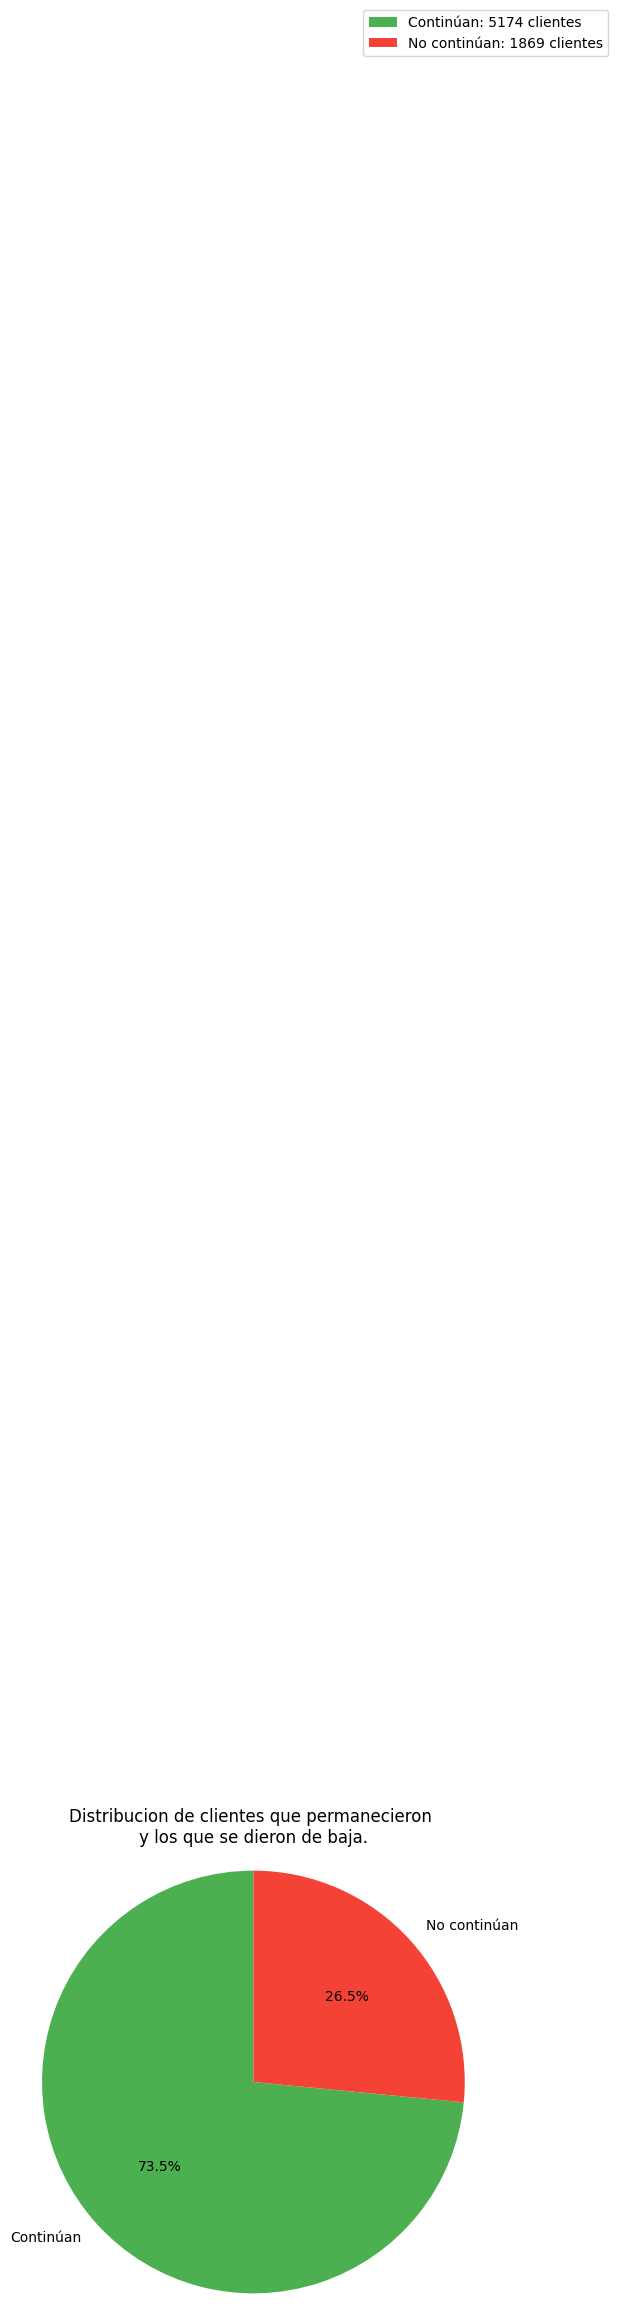

In [35]:
import matplotlib.pyplot as plt

# Conteo de clientes
churn_counts = df_normalizado['Churn'].value_counts()

# Etiquetas personalizadas
labels = ['Continúan', 'No continúan']

# Texto de la leyenda con conteo
legend_labels = [f'{label}: {count} clientes' for label, count in zip(labels, churn_counts)]


# Gráfico de pastel
plt.figure(figsize=(6,6))
plt.pie(churn_counts, labels=labels, autopct='%1.1f%%', startangle=90, colors=['#4CAF50', '#F44336'])
plt.title('Distribucion de clientes que permanecieron \ny los que se dieron de baja.')
# Agrega leyenda con conteos reales
plt.legend(legend_labels,loc='upper center', bbox_to_anchor=(1, 5))


plt.axis('equal')
plt.show()
